<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/03_pytorch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[View Source Code](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/03_pytorch_computer_vision.ipynb) | [View Slides](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/slides/03_pytorch_computer_vision.pdf) | [Watch Video Walkthrough](https://youtu.be/Z_ikDlimN6A?t=50417) 

[计算机视觉](https://en.wikipedia.org/wiki/Computer_vision) 是教计算机看东西的艺术。

例如，它可能涉及构建一个模型来分类照片是猫还是狗（[二分类]（https://developers.google.com/machine-learning/glossary#binary-classification））。

或者一张照片是猫、狗还是鸡（[多分类](https://developers.google.com/machine-learning/glossary#multi-class-classification)）。

或者识别汽车在视频帧中出现的位置（[对象检测]（https://en.wikipedia.org/wiki/Object_detection））。

或者找出图像中不同对象的分离位置（[全景分割]（https://arxiv.org/abs/1801.00868））。

![示例计算机视觉问题](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-computer-vision-problems.png)
*二分类、多分类、对象检测和分割的示例计算机视觉问题。*

## Where does computer vision get used?

如果您使用智能手机，那么您已经使用过计算机视觉。

相机和照片应用程序使用 [计算机视觉增强](https://machinelearning.apple.com/research/panoptic-segmentation) 并对图像进行排序。

现代汽车使用 [计算机视觉](https://youtu.be/j0z4FweCy4M?t=2989) 来避开其他汽车并保持在车道线内。

制造商使用计算机视觉来识别各种产品中的缺陷。

安全摄像头使用计算机视觉来检测潜在的入侵者。

从本质上讲，任何可以在视觉上描述的东西都可能是潜在的计算机视觉问题。

## What we're going to cover

We're going to apply the PyTorch Workflow we've been learning in the past couple of sections to computer vision.

![a PyTorch workflow with a computer vision focus](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-pytorch-computer-vision-workflow.png)

具体包括：

| **Topic** | **Contents** |
| ----- | ----- |
| **0.  PyTorch中的CV库** | PyTorch 内置了很多CV有关的库  |
| **1. 加载数据** | 从[FashionMNIST](https://github.com/zalandoresearch/fashion-mnist)中加载图片|
| **2. 准备数据** |我们有了一些图片, 让我们用 [PyTorch `DataLoader`](https://pytorch.org/docs/stable/data.html) 加载，以便在训练循环中使用。 |
| **3. Model 0: Building a baseline model** | 创建一个多分类模型,  **loss function**, **optimizer** 和 **training loop**. | 
| **4. Making predictions and evaluting model 0** | 检测我们的基本模型 |
| **5. Setup device agnostic code for future models** | 设置device |
| **6. Model 1: Adding non-linearity** | 增加非线性，看看是否会提升模型。 |
| **7. Model 2: Convolutional Neural Network (CNN)** | 是时候了解计算机视觉并介绍强大的卷积神经网络（CNN）架构了。|
| **8. Comparing our models** | We've built three different models, let's compare them. |
| **9. Evaluating our best model** | Let's make some predictons on random images and evaluate our best model. |
| **10. Making a confusion matrix** |混淆矩阵是评估分类模型的好方法，让我们看看如何制作|。 |
| **11. Saving and loading the best performing model** | Since we might want to use our model for later, let's save it and make sure it loads back in correctly. |

## Where can can you get help?

All of the materials for this course [live on GitHub](https://github.com/mrdbourke/pytorch-deep-learning).

If you run into trouble, you can ask a question on the course [GitHub Discussions page](https://github.com/mrdbourke/pytorch-deep-learning/discussions) there too.

And of course, there's the [PyTorch documentation](https://pytorch.org/docs/stable/index.html) and [PyTorch developer forums](https://discuss.pytorch.org/), a very helpful place for all things PyTorch. 

## 0. Computer vision libraries in PyTorch

在开始编写代码之前，让我们先谈谈您应该了解的一些 PyTorch 计算机视觉库。

| PyTorch module | What does it do? |
| ----- | ----- |
| [`torchvision`](https://pytorch.org/vision/stable/index.html) | 包含经常用于计算机视觉问题的数据集、模型架构和图像转换。 |
| [`torchvision.datasets`](https://pytorch.org/vision/stable/datasets.html) | 在这里，您将找到许多示例计算机视觉数据集，用于解决图像分类、对象检测、图像字幕、视频分类等一系列问题。 它还包含[一系列用于制作自定义数据集的基类](https://pytorch.org/vision/stable/datasets.html#base-classes-for-custom-datasets). |
| [`torchvision.models`](https://pytorch.org/vision/stable/models.html) | 该模块包含在 PyTorch 中实现的性能良好且常用的计算机视觉模型架构，您可以将它们用于您自己的问题。| 
| [`torchvision.transforms`](https://pytorch.org/vision/stable/transforms.html) | 在与模型一起使用之前，通常需要对图像进行转换（转换为数字/处理/增强），常见的图像转换可以在此处找到。 | 
| [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) | PyTorch 的基础数据集类.  | 
| [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#module-torch.utils.data) | 在数据集上创建 Python 可迭代对象(数据集从 `torch.utils.data.Dataset`创建)。 |

> **注意：** `torch.utils.data.Dataset` 和 `torch.utils.data.DataLoader` 类不仅适用于 PyTorch 中的计算机视觉，它们还能够处理许多不同类型的数据。

现在我们已经介绍了一些最重要的 PyTorch 计算机视觉库，让我们导入相关的依赖项。

In [1]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision 
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 1.10.2
torchvision version: 0.11.3


## 1. Getting a dataset

要开始研究计算机视觉问题，让我们获取一个计算机视觉数据集。

我们将从 FashionMNIST 开始。

MNIST 代表修改后的国家标准与技术研究所。

[原始 MNIST 数据集](https://en.wikipedia.org/wiki/MNIST_database) 包含数千个手写数字的示例（从 0 到 9），并用于构建计算机视觉模型以识别邮政服务的数字。

Zalando Research 制作的 [FashionMNIST](https://github.com/zalandoresearch/fashion-mnist) 与之类似。

但是它包含 10 种不同服装的灰度图像。

![FashionMNIST 示例图片](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-fashion-mnist-slide.png)
*`torchvision.datasets` 包含许多示例数据集，可用于练习编写计算机视觉代码。 FashionMNIST 就是这些数据集之一。 而且由于它有 10 个不同的图像类别（不同类型的服装），这是一个多类别分类问题。*

稍后，我们将构建一个计算机视觉神经网络来识别这些图像中不同风格的服装。

PyTorch 有一堆常见的计算机视觉数据集存储在“torchvision.datasets”中。

在 [`torchvision.datasets.FashionMNIST()`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) 中包括 FashionMNIST。

要下载它，我们提供以下参数：
* `root: str` - 您要将数据下载到哪个文件夹？
* `train: Bool` - 你想要训练还是测试拆分？
* `download: Bool` - 应该下载数据吗？
* `transform: torchvision.transforms` - 您想对数据进行哪些转换？
* `target_transform` - 你也可以转换目标（标签）。

`torchvision` 中的许多其他数据集都有这些参数选项。

In [2]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

让我们看看 training data的第一个样本。

In [3]:
# See first training sample
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

### 1.1 Input and output shapes of a computer vision model

We've got a big tensor of values (the image) leading to a single value for the target (the label).

Let's see the image shape.

In [4]:
# What's the shape of the image?
image.shape

torch.Size([1, 28, 28])

image tensor 的shape是`[1, 28, 28]` ，具体而言：

```
[color_channels=1, height=28, width=28]
```

`color_channels=1` 意味着图像是灰度图。

![fashionMNIST 问题的示例输入和输出形状](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-computer-vision-input-and-output-shapes.png )
*各种问题会有不同的输入和输出形状。 但前提仍然是：将数据编码为数字，构建模型以在这些数字中找到模式，将这些模式转换为有意义的东西。*
If `color_channels=3`, the image comes in pixel values for red, green and blue (this is also known a the [RGB color model](https://en.wikipedia.org/wiki/RGB_color_model)).

我们当前张量的顺序通常称为“CHW”（Color Channels, Height, Width）（颜色通道、高度、宽度）。
关于图像应该表示为“CHW”（首先是颜色通道）还是“HWC”（最后是颜色通道）存在争议。

> **注意：** 您还会看到 `NCHW` 和 `NHWC` 格式，其中 `N` 代表 *图像数量*。 例如，如果你有一个 `batch_size=32`，你的张量形状可能是 `[32, 1, 28, 28]`。 稍后我们将介绍批量大小（batch sizes）。

PyTorch 通常接受“NCHW”（通道优先）作为许多操作符的默认设置。

但是，PyTorch 还解释说 `NHWC`（通道最后）表现更好，并且是[被认为是最佳实践]（https://pytorch.org/blog/tensor-memory-format-matters/#pytorch-best-practice）。

目前，由于我们的数据集和模型相对较小，这不会产生太大影响。

但是请记住，当您处理更大的图像数据集并使用卷积神经网络时（我们稍后会看到这些）。

让我们看看我们数据的更多形状。

In [5]:
# How many samples are there? 
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

 60,000 training samples和10,000 testing samples.

他们的类别是什么？

可以用 `.classes` 属性查看。

In [48]:
# See classes
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

很好！ 看起来我们正在处理 10 种不同的衣服。

因为我们正在处理 10 个不同的类，这意味着我们的问题是**多分类**。

让我们可视化。

### 1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28])


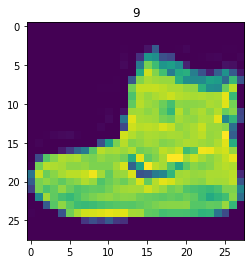

In [7]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) # image shape is [1, 28, 28] (colour channels, height, width)
plt.title(label);

我们可以使用 `plt.imshow()` 的 `cmap` 参数将图像转换为灰度。

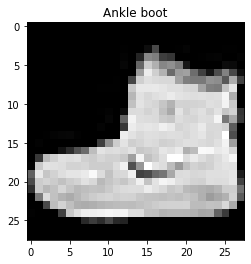

In [8]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);

漂亮，就像像素化灰度踝靴一样漂亮。

让我们再看几个。

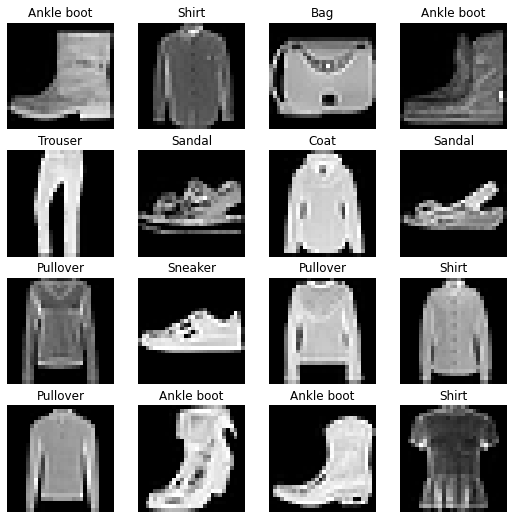

In [9]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

嗯，这个数据集看起来不太美观。

但是，我们将要学习的关于如何为其构建模型的原则在广泛的计算机视觉问题中是相似的。

本质上，获取像素值并构建模型以在其中找到模式以用于未来的像素值。

另外，即使对于这个小数据集（是的，即使是深度学习中的 60,000 张图像也被认为是很小的），你能编写一个程序来对它们中的每一个进行分类吗？

你可能可以。

但我认为在 PyTorch 中编写模型会更快。
> **问题：**您认为上述数据可以仅用直线（线性）线建模吗？ 还是您认为您还需要非直线（非线性）线？

## 2. Prepare DataLoader

现在我们已经准备好了一个数据集。

下一步是使用 [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) 或 `DataLoader` 。

`DataLoader` 做你认为它可能做的事情。

它有助于将数据加载到模型中。

用于训练和推理。

它将一个大的“数据集”变成了一个 Python 可迭代的小块。

这些较小的块称为 **batches** 或 **mini-batches**，可以通过 `batch_size` 参数设置。

为什么要这样做？

因为它的计算效率更高。

在理想情况下，您可以一次对所有数据进行前向传递和后向传递。

但是一旦你开始使用非常大的数据集，除非你有无限的计算能力，否则将它们分成批次会更容易。

它还为您的模型提供了更多改进的机会。

使用 **mini-batch**（数据的一小部分），梯度下降在每个 epoch 中执行的频率更高（每个 mini-batch 一次，而不是每个 epoch 一次）。

批量大小应该为多少？

[32 是一个很好的起点](https://twitter.com/ylecun/status/989610208497360896?s=20&t=N96J_jotN--PYuJk2WcjMw) 解决相当多的问题。

但由于这是一个您可以设置的值（**超参数**），您可以尝试所有不同类型的值，尽管通常最常使用 2 的幂（例如 32、64、128、256、512）。

![批处理数据集的示例](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-batching-fashionmnist.png)
*批处理 FashionMNIST，批处理大小为 32 并打开随机播放。 其他数据集也会发生类似的批处理过程，但会因批处理大小而异。*

让我们为我们的训练和测试集创建“DataLoader”。 

In [29]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch? 
    shuffle=True # shuffle data every epoch?
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False # don't necessarily have to shuffle the testing data
)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x00000229E02F8F70>, <torch.utils.data.dataloader.DataLoader object at 0x00000229E02F87F0>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [11]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

我们可以通过检查单个样本看到数据保持不变。

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


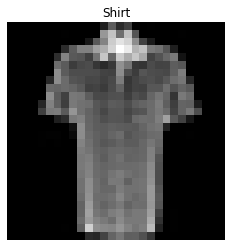

In [30]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model 0: Build a baseline model

数据已加载并准备好！

是时候通过继承 `nn.Module` 来构建**基线模型**了。

**基线模型**是您能想象到的最简单的模型之一。

您将基线用作起点，并尝试使用后续更复杂的模型对其进行改进。

我们的基线将包含两个 [`nn.Linear()`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) 层。

我们在上一节中已经做到了这一点，但会有一点不同。

因为我们正在处理图像数据，所以我们将使用不同的层来开始。

这就是 [`nn.Flatten()`](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html) 层。

`nn.Flatten()` 将张量的维度压缩为单个向量。

当你看到它时，这更容易理解。

In [31]:
# Create a flatten layer
flatten_model = nn.Flatten() # all nn modules function as a model (can do a forward pass)

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

# Try uncommenting below and see what happens
#print(x)
#print(output)

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


`nn.Flatten()` 层将我们的形状从 `[color_channels, height, width]` 变为 `[color_channels, height*width]`。

为什么要这样做？

因为我们现在已经将像素数据从高度和宽度维度转换为一个长的**特征向量**。

并且`nn.Linear()`层喜欢他们的输入是特征向量的形式。

让我们使用 nn.Flatten() 作为第一层创建我们的第一个模型。

In [32]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # neural networks like their inputs in vector form
            nn.Linear(in_features=input_shape, out_features=hidden_units), # in_features = number of features in a data sample (784 pixels)
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
    
    def forward(self, x):
        return self.layer_stack(x)

精彩！

我们有一个可以使用的基线模型类，现在让我们实例化一个模型。

我们需要设置以下参数：
* `input_shape=784` - 这是模型中有多少特征，在我们的例子中，它对应于目标图像中的每个像素（28 像素高 x 28 像素宽 = 784 个特征）。
* `hidden_units=10` - 隐藏层中单元/神经元的数量，这个数字可以是任何你想要的，但为了保持模型小，我们将从 `10` 开始。
* `output_shape=len(class_names)` - 由于我们正在处理多类分类问题，因此我们需要数据集中的每个类都有一个输出神经元。

让我们创建一个模型实例并暂时发送到 CPU（我们将运行一个小型测试，在 CPU 上运行“model_0”与在 GPU 上运行类似模型）。

In [33]:
torch.manual_seed(42)

# Need to setup model with input parameters
model_0 = FashionMNISTModelV0(input_shape=784, # one for every pixel (28x28)
    hidden_units=10, # how many units in the hiden layer
    output_shape=len(class_names) # one for every class
)
model_0.to("cpu") # keep model on CPU to begin with 

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

### 3.1 Setup loss, optimizer and evaluation metrics

Since we're working on a classification problem, let's bring in our [`helper_functions.py` script](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py) and subsequently the `accuracy_fn()` we defined in [notebook 02](https://www.learnpytorch.io/02_pytorch_classification/).

> **注意：** 您也可以从 [TorchMetrics 包](https://torchmetrics.readthedocs.io/en/latest/) 中导入各种评估指标，而不是导入和使用我们自己的准确度函数或评估指标 ）。

In [34]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [35]:
# Import accuracy metric
from helper_functions import accuracy_fn # Note: could also use torchmetrics.Accuracy()

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # this is also called "criterion"/"cost function" in some places
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

### 3.2 Creating a function to time our experiments

损失函数和优化器准备好了！

是时候开始训练模型了。

但是我们在训练的时候做一个小实验怎么样。

让我们创建一个计时函数来测量我们的模型在 CPU 上与使用 GPU 训练所花费的时间。

我们将在 CPU 上训练这个模型，但在 GPU 上训练下一个模型，看看会发生什么。

我们的计时函数将从 Python [`timeit` 模块](https://docs.python.org/3/library/timeit.html#timeit.default_timer) 导入 [`timeit.default_timer()` (https://docs.python.org/3/library/timeit.html).。

In [18]:
from timeit import default_timer as timer 
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format). 
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

### 3.3 Creating a training loop and training a model on batches of data

很棒！

看起来我们已经准备好拼图的所有部分，一个计时器，一个损失函数，一个优化器，一个模型，最重要的是，一些数据。

现在让我们创建一个训练循环和一个测试循环来训练和评估我们的模型。

我们将使用与之前的笔记本相同的步骤，但由于我们的数据现在是批处理形式，我们将添加另一个循环来循环遍历我们的数据批处理。

我们的数据批次包含在我们的 `DataLoader`、`train_dataloader` 和 `test_dataloader` 中，分别用于训练和测试数据拆分。

一个批次是“X”（特征）和“y”（标签）的“BATCH_SIZE”样本，因为我们使用的是“BATCH_SIZE=32”，所以我们的批次有 32 个图像和目标样本。

而且由于我们是在批量数据上进行计算，我们的损失和评估指标将按照**每批次**计算，而不是跨整个数据集计算。

这意味着我们必须将损失和准确率值除以每个数据集各自数据加载器中的批次数。

让我们一步一步来：
1. 循环遍历epochs。
2. 循环训练批次train batch，执行训练步骤，计算训练损失*每批次*。
3. 循环测试批次test batch，执行测试步骤，计算测试损失*每批次*。
4. 打印出正在发生的事情。
5. 计时（为了好玩）。

In [36]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train() 
        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)
    
    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy 
    test_loss, test_acc = 0, 0 
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X)
           
            # 2. Calculate loss (accumatively)
            test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
        
        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)

    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time      
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, 
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

Train time on cpu: 34.880 seconds


好的！ 看起来我们的基线模型做得相当好。

训练也没有花太长时间，即使只是在 CPU 上，我想知道它是否会在 GPU 上加速？

让我们编写一些代码来评估我们的模型。

## 4. Make predictions and get Model 0 results

由于我们将构建一些模型，因此编写一些代码以类似的方式评估它们是一个好主意。

即，让我们创建一个函数，该函数接收经过训练的模型、“DataLoader”、损失函数和准确度函数。

该函数将使用模型对“DataLoader”中的数据进行预测，然后我们可以使用损失函数和准确度函数评估这些预测。

In [37]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Make predictions with the model
            y_pred = model(X)
            
            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, 
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)
        
        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

看起来不错！

稍后我们可以使用此字典将基线模型结果与其他模型进行比较。

## 5. Setup device agnostic-code (for using a GPU if there is one)
We've seen how long it takes to train ma PyTorch model on 60,000 samples on CPU.

> **Note:** Model training time is dependent on hardware used. Generally, more processors means faster training and smaller models on smaller datasets will often train faster than large models and large datasets.

Now let's setup some [device-agnostic code](https://pytorch.org/docs/stable/notes/cuda.html#best-practices) for our models and data to run on GPU if it's available.

If you're running this notebook on Google Colab, and you don't a GPU turned on yet, it's now time to turn one on via `Runtime -> Change runtime type -> Hardware accelerator -> GPU`. If you do this, your runtime will likely reset and you'll have to run all of the cells above by going `Runtime -> Run before`.

In [38]:
# Setup device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Beautiful!

Let's build another model.

## 6. Model 1: 使用非线性创建一个更好的模型

我们了解了 [notebook 02 中非线性的力量](https://www.learnpytorch.io/02_pytorch_classification/#6-the-missing-piece-non-linearity)。

看到我们一直在处理的数据，你认为它需要非线性函数吗？

请记住，线性表示直线，非线性表示非直线。

让我们来了解一下。

我们将通过重新创建与之前类似的模型来做到这一点，除了这次我们将在每个线性层之间放置非线性函数（`nn.ReLU()`）。

In [49]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # flatten inputs into single vector
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )
    
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

这看起来不错。

现在让我们用我们之前使用的相同设置来实例化它。

我们需要`input_shape=784`（等于我们图像数据的特征数量）、`hidden_units=10`（从小开始，与我们的基线模型相同）和`output_shape=len(class_names)`（一个输出 每班单位）。

> **注意：** 请注意我们如何保持模型的大部分设置相同，除了一项更改：添加非线性层。 这是运行一系列机器学习实验的标准做法，改变一件事，看看会发生什么，然后再做一次，再一次，再一次。

In [50]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784, # number of input features
    hidden_units=10,
    output_shape=len(class_names) # number of output classes desired
).to(device) # send model to GPU if it's available
next(model_1.parameters()).device # check model device

device(type='cuda', index=0)

### 6.1 Setup loss, optimizer and evaluation metrics

As usual, we'll setup a loss function, an optimizer and an evaluation metric (we could do multiple evaluation metrics but we'll stick with accuracy for now).

In [51]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), 
                            lr=0.1)

### 6.2 Functionizing training and test loops
到目前为止，我们一直在一遍又一遍地编写训练和测试循环。

让我们再次编写它们，但这次我们将它们放在函数中，以便可以一次又一次地调用它们。

而且因为我们现在使用的是与设备无关的代码，所以我们一定会在我们的特征 (`X`) 和目标 (`y`) 张量上调用`.to(device)`。

对于训练循环，我们将创建一个名为“train_step()”的函数，该函数接受一个模型、一个“DataLoader”、一个损失函数和一个优化器。

测试循环将类似，但它会被称为“test_step()”，它会接受一个模型、一个“DataLoader”、一个损失函数和一个评估函数。

> **注意：** 由于这些是函数，您可以以任何您喜欢的方式自定义它们。 我们在这里所做的可以被认为是针对我们特定分类用例的准系统训练和测试功能。

In [43]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode(): 
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass
            test_pred = model(X)
            
            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )
        
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

呜呼！

现在我们已经有了一些用于训练和测试模型的函数，让我们运行它们。

我们将在每个 epoch 的另一个循环中这样做。

这样，对于每个 epoch，我们都会进行训练和测试步骤。

> **注意：** 您可以自定义执行测试步骤的频率。 有时人们每 5 个 epoch 或 10 个 epoch 或在我们的例子中，每个 epoch 做一次。

让我们也计时，看看我们的代码在 GPU 上运行需要多长时间。

In [44]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=model_1, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.09199 | Train accuracy: 61.34%
Test loss: 0.95636 | Test accuracy: 65.00%

Epoch: 1
---------
Train loss: 0.78101 | Train accuracy: 71.93%
Test loss: 0.72227 | Test accuracy: 73.91%

Epoch: 2
---------
Train loss: 0.67027 | Train accuracy: 75.94%
Test loss: 0.68500 | Test accuracy: 75.02%

Train time on cuda: 31.758 seconds


出色的！

我们的模型经过训练，但训练时间更长？

> **注意：** CUDA 与 CPU 的训练时间很大程度上取决于您使用的 CPU/GPU 的质量。继续阅读以获得更详细的答案。

> **问题：**“我使用了 GPU，但我的模型没有训练得更快，为什么会这样？”
>
> **答案：** 嗯，一个原因可能是因为您的数据集和模型都非常小（就像我们正在使用的数据集和模型一样）使用 GPU 的好处超过了实际传输所需的时间那里的数据。
>
> 将数据从 CPU 内存（默认）复制到 GPU 内存之间存在一个小瓶颈。
>
> 因此，对于较小的模型和数据集，CPU 实际上可能是计算的最佳位置。
>
> 但是对于更大的数据集和模型，GPU 可以提供的计算速度通常远远超过从那里获取数据的成本。
>
> 但是，这在很大程度上取决于您使用的硬件。通过练习，您将习惯训练模型的最佳位置。

让我们使用我们的 `eval_model()` 函数评估我们训练的 `model_1` 并看看它是如何进行的。

In [45]:
torch.manual_seed(42)

# Note: This will error due to `eval_model()` not using device agnostic code 
model_1_results = eval_model(model=model_1, 
    data_loader=test_dataloader,
    loss_fn=loss_fn, 
    accuracy_fn=accuracy_fn) 
model_1_results 

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_addmm)

不好了！

看起来我们的 `eval_model()` 函数出错了：

> `RuntimeError: 预期所有张量都在同一个设备上，但发现至少有两个设备，cuda:0 和 cpu！ （在方法 wrapper_addmm 中检查参数 mat1 的参数时）`

这是因为我们已经将数据和模型设置为使用与设备无关的代码，而不是我们的评估函数。

我们如何通过将目标 `device` 参数传递给 `eval_model()` 函数来解决这个问题？

然后我们将再次尝试计算结果。

In [46]:
# Move values to device
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn, 
               device: torch.device = device):
    """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        
        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 1 results with device-agnostic code 
model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn,
    device=device
)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008368492126,
 'model_acc': 75.01996805111821}

In [47]:
# Check baseline results
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

哇，在这种情况下，看起来向我们的模型添加非线性会使它的性能比基线更差。

这是机器学习中需要注意的事情，有时你认为应该工作的事情却没有。

然后你认为可能行不通的事情发生了。

它一半是科学，一半是艺术。

从表面上看，我们的模型似乎在训练数据上**过拟合**。

过度拟合意味着我们的模型很好地学习了训练数据，但这些模式并没有推广到测试数据。

修复过度拟合的两个主要方法包括：
1. 使用更小或不同的模型（某些模型比其他模型更适合某些类型的数据）。
2. 使用更大的数据集（数据越多，模型学习可概括模式的机会就越大）。

还有更多，但我将把它作为一个挑战留给你去探索。

尝试在线搜索“防止机器学习过度拟合的方法”，看看会发生什么。

同时，让我们看看第 1 点：使用不同的模型。

## 7. Model 2: 卷积神经网络 Convolutional Neural Network (CNN)

好吧，是时候让事情更上一层楼了。

是时候创建一个[卷积神经网络]（https://en.wikipedia.org/wiki/Convolutional_neural_network）（CNN 或 ConvNet）。

CNN 以其在视觉数据中寻找模式的能力而闻名。

由于我们正在处理视觉数据，让我们看看使用 CNN 模型是否可以改进我们的基线。

我们将要使用的 CNN 模型称为 TinyVGG，来自 [CNN Explainer](https://poloclub.github.io/cnn-explainer/) 网站。

它遵循卷积神经网络的典型结构：

`输入层->[卷积层->激活层->池化层]->输出层`

其中`[卷积层->激活层->池化层]`的内容可以放大并重复多次，具体取决于要求。

### What model should I use?

> **问题：** 等等，你说 CNN 对图像有好处，还有其他我应该注意的模型类型吗？

好问题。

该表是使用哪种模型的一个很好的通用指南（尽管有例外）。

| **Problem type** | **Model to use (generally)** | **Code example** |
| ----- | ----- | ----- |
| Structured data (Excel spreadsheets, row and column data) | Gradient boosted models, Random Forests, XGBoost | [`sklearn.ensemble`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble), [XGBoost library](https://xgboost.readthedocs.io/en/stable/) |
| Unstructured data (images, audio, language) | Convolutional Neural Networks, Transformers | [`torchvision.models`](https://pytorch.org/vision/stable/models.html), [HuggingFace Transformers](https://huggingface.co/docs/transformers/index) | 

> **Note:** 上表仅供参考，您最终使用的模型将高度依赖于您正在处理的问题和您拥有的约束（数据量、延迟要求）。

模型说得够多了，现在让我们在 [CNN Explainer 网站](https://poloclub.github.io/cnn-explainer/) 上构建一个复制模型的 CNN。

![TinyVGG 架构，由 CNN 解释器网站设置](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-cnn-explainer-model.png)

为此，我们将利用 [`nn.Conv2d()`](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html) 和 [`nn.MaxPool2d()` ]（https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html）来自`torch.nn`的层。


In [52]:
# Create a convolutional neural network 
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*7*7, 
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, 
    hidden_units=10, 
    output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

好的！

我们最大的模型！

我们所做的是机器学习中的常见做法。

在某处找到模型架构并用代码复制它。

### 7.1 Stepping through `nn.Conv2d()`

我们可以开始使用上面的模型，看看会发生什么，但让我们首先了解我们添加的两个新层：
* [`nn.Conv2d()`](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html)，也称为卷积层。
* [`nn.MaxPool2d()`](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html)，也称为最大池化层。

> **问题：** `nn.Conv2d()` 中的“2d”代表什么？
>
> 2d 用于二维数据。 例如，我们的图像有两个维度：高度和宽度。 是的，有颜色通道尺寸，但每个颜色通道尺寸也有两个尺寸：高度和宽度。
>
> 对于其他维度数据（例如文本的 1D 或 3D 对象的 3D）还有 `nn.Conv1d()` 和 `nn.Conv3d()`。

为了测试这些层，让我们创建一些玩具数据，就像 CNN Explainer 上使用的数据一样。

In [53]:
torch.manual_seed(42)

# Create sample batch of random numbers with same size as image batch
images = torch.randn(size=(32, 3, 64, 64)) # [batch_size, color_channels, height, width]
test_image = images[0] # get a single image for testing
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]") 
print(f"Single image pixel values:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,

让我们创建一个带有各种参数的示例 `nn.Conv2d()`：
* `in_channels` (int) - 输入图像中的通道数。
* `out_channels` (int) - 卷积输出的通道数。
* `kernel_size` (int or tuple) - 卷积内核/过滤器的大小。
* `stride` (int or tuple, optional) - 卷积内核一次走多远。 默认值：1。
* `padding` (int, tuple, str) - 填充添加到输入的所有四个边。 默认值：0。

![遍历 Conv2d 层的不同参数的示例](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-conv2d-layer.gif)

*更改 `nn.Conv2d()` 层的超参数时发生的示例。*

In [54]:
torch.manual_seed(42)

# Create a convolutional layer with same dimensions as TinyVGG 
# (try changing any of the parameters and see what happens)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0) # also try using "valid" or "same" here 

# Pass the data through the convolutional layer
conv_layer(test_image) # Note: If running PyTorch <1.11.0, this will error because of shape issues (nn.Conv.2d() expects a 4d tensor as input) 

RuntimeError: Expected 4-dimensional input for 4-dimensional weight [10, 3, 3, 3], but got 3-dimensional input of size [3, 64, 64] instead

如果我们尝试传入单个图像，则会出现形状不匹配错误：
> `RuntimeError: Expected 4-dimensional input for 4-dimensional weight [10, 3, 3, 3], but got 3-dimensional input of size [3, 64, 64] instead`
>
> **Note:** If you're running PyTorch 1.11.0+, this error won't occur.

这是因为我们的 `nn.Conv2d()` 层需要一个 4 维张量作为输入，其大小为 `(N, C, H, W)` 或 `[batch_size, color_channels, height, width]`。

现在我们的单张图片“test_image”只有“[color_channels, height, width]”或“[3, 64, 64]”的形状。

我们可以使用 test_image.unsqueeze(dim=0) 为单个图像修复这个问题，为 N 添加一个额外的维度。

In [55]:
# Add extra dimension to test image
test_image.unsqueeze(dim=0).shape

torch.Size([1, 3, 64, 64])

In [56]:
# Pass test image with extra dimension through conv_layer
conv_layer(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 62, 62])

嗯，注意我们的形状发生了什么变化（与 [CNN Explainer](https://poloclub.github.io/cnn-explainer/) 上的 TinyVGG 的第一层形状相同），我们得到不同的通道大小以及不同的 像素大小。

如果我们改变 `conv_layer` 的值呢？

In [57]:
torch.manual_seed(42)
# Create a new conv_layer with different values (try setting these to whatever you like)
conv_layer_2 = nn.Conv2d(in_channels=3, # same number of color channels as our input image
                         out_channels=10,
                         kernel_size=(5, 5), # kernel is usually a square so a tuple also works
                         stride=2,
                         padding=0)

# Pass single image through new conv_layer_2 (this calls nn.Conv2d()'s forward() method on the input)
conv_layer_2(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 30, 30])

哇，我们得到另一个形状变化。

现在我们的图像的形状是“[1, 10, 30, 30]”（使用不同的值会有所不同）或“[batch_size=1, color_channels=10, height=30, width=30]”。

这里发生了什么？

在幕后，我们的 nn.Conv2d() 正在压缩存储在图像中的信息。

它通过针对其内部参数对输入（我们的测试图像）执行操作来做到这一点。

其目标类似于我们一直在构建的所有其他神经网络。

由于优化器的一些帮助，数据进入并且层尝试更新其内部参数（模式）以降低损失函数。

唯一的区别是*如何*不同层计算它们的参数更新，或者在 PyTorch 术语中，存在于层“forward()”方法中的操作。

如果我们检查我们的 `conv_layer_2.state_dict()`，我们会发现与我们之前看到的相似的权重和偏差设置。

In [58]:
# Check out the conv_layer_2 internal parameters
print(conv_layer_2.state_dict())

OrderedDict([('weight', tensor([[[[ 0.0883,  0.0958, -0.0271,  0.1061, -0.0253],
          [ 0.0233, -0.0562,  0.0678,  0.1018, -0.0847],
          [ 0.1004,  0.0216,  0.0853,  0.0156,  0.0557],
          [-0.0163,  0.0890,  0.0171, -0.0539,  0.0294],
          [-0.0532, -0.0135, -0.0469,  0.0766, -0.0911]],

         [[-0.0532, -0.0326, -0.0694,  0.0109, -0.1140],
          [ 0.1043, -0.0981,  0.0891,  0.0192, -0.0375],
          [ 0.0714,  0.0180,  0.0933,  0.0126, -0.0364],
          [ 0.0310, -0.0313,  0.0486,  0.1031,  0.0667],
          [-0.0505,  0.0667,  0.0207,  0.0586, -0.0704]],

         [[-0.1143, -0.0446, -0.0886,  0.0947,  0.0333],
          [ 0.0478,  0.0365, -0.0020,  0.0904, -0.0820],
          [ 0.0073, -0.0788,  0.0356, -0.0398,  0.0354],
          [-0.0241,  0.0958, -0.0684, -0.0689, -0.0689],
          [ 0.1039,  0.0385,  0.1111, -0.0953, -0.1145]]],


        [[[-0.0903, -0.0777,  0.0468,  0.0413,  0.0959],
          [-0.0596, -0.0787,  0.0613, -0.0467,  0.0701],

看看上面的输出！ 一组用于权重和偏差张量的随机数。

这些形状由我们在设置时传递给 nn.Conv2d() 的输入进行操作。

让我们检查一下。

In [59]:
# Get shapes of weight and bias tensors within conv_layer_2
print(f"conv_layer_2 weight shape: \n{conv_layer_2.weight.shape} -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]")
print(f"\nconv_layer_2 bias shape: \n{conv_layer_2.bias.shape} -> [out_channels=10]")

conv_layer_2 weight shape: 
torch.Size([10, 3, 5, 5]) -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]

conv_layer_2 bias shape: 
torch.Size([10]) -> [out_channels=10]


> **问题：** 我们应该如何设置 `nn.Conv2d()` 层的参数？
>
> 这是一个很好的问题。 但与机器学习中的许多其他事情类似，这些值并不是一成不变的（回想一下，因为这些值是我们可以自己设置的，它们被称为“**超参数**”）。
>
> 找出答案的最佳方法是尝试不同的值，看看它们如何影响模型的性能。
>
> 或者更好的是，找到一个与您的问题类似的工作示例（就像我们对 TinyVGG 所做的那样）并复制它。

我们在这里使用与我们之前看到的不同的层。

但前提保持不变：从随机数开始并更新它们以更好地表示数据。

### 7.2 Stepping through `nn.MaxPool2d()`
看看`nn.MaxPool2d()`的功能：

In [60]:
# Print out original image shape without and with unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(dim=0).shape}")

# Create a sample nn.MaxPoo2d() layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


注意 nn.MaxPool2d() 层内外发生的形状变化。

`nn.MaxPool2d()` 层的 `kernel_size` 会影响输出形状的大小。

在我们的例子中，形状从“62x62”图像减半为“31x31”图像。

让我们用更小的张量来看看这项工作。

In [61]:
torch.manual_seed(42)
# Create a random tensor with a similiar number of dimensions to our images
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"Random tensor:\n{random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2) # see what happens when you change the kernel_size value 

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n{max_pool_tensor} <- this is the maximum value from random_tensor")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")

Random tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
tensor([[[[0.3367]]]]) <- this is the maximum value from random_tensor
Max pool tensor shape: torch.Size([1, 1, 1, 1])


注意 `random_tensor` 和 `max_pool_tensor` 之间的最后两个维度，它们从 `[2, 2]` 到 `[1, 1]`。

从本质上讲，它们减半。

对于 `nn.MaxPool2d()` 的 `kernel_size` 的不同值，变化会有所不同。

还要注意 `max_pool_tensor` 中剩余的值是 `random_tensor` 中的 **maximum** 值。

这里发生了什么事？

这是神经网络之谜的另一个重要部分。

本质上，**神经网络中的每一层都试图将数据从高维空间压缩到低维空间**。

换句话说，获取大量数字（原始数据）并学习这些数字中的模式，这些模式具有预测性，同时在大小上也比原始值*小*。

从人工智能的角度来看，您可以考虑神经网络的整个目标是来*压缩*信息。
![each layer of a neural network compresses the original input data into a smaller representation that is (hopefully) capable of making predictions on future input data](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-conv-net-as-compression.png)

这意味着，从神经网络的角度来看，智能就是压缩。

这是使用“nn.MaxPool2d()”层的想法：从张量的一部分中获取最大值并忽略其余部分。

本质上，降低张量的维度，同时仍保留（希望）重要部分的信息。

`nn.Conv2d()` 层也是如此。

除了取最大值之外，`nn.Conv2d()` 对数据执行卷积操作（请参阅 [CNN Explainer 网页上的实际操作]（https://poloclub.github.io/cnn-explainer/ ））。
> **练习：** 你认为 [`nn.AvgPool2d()`](https://pytorch.org/docs/stable/generated/torch.nn.AvgPool2d.html) 层有什么作用？ 尝试像我们上面所做的那样制作一个随机张量并将其传递。 检查输入和输出形状以及输入和输出值。

> **课外：**查找“最常见的卷积神经网络”，你发现了哪些架构？ 它们中的任何一个是否包含在 [`torchvision.models`](https://pytorch.org/vision/stable/models.html) 库中？ 你觉得你能用这些做什么？

### 7.3 Setup a loss function and optimizer for `model_2`

现在是前进并开始训练的时候了！

让我们设置一个损失函数和一个优化器。

我们将像以前一样使用函数，`nn.CrossEntropyLoss()` 作为损失函数（因为我们正在处理多类分类数据）。

并且 `torch.optim.SGD()` 作为优化器以 `0.1` 的学习率优化`model_2.parameters()`。

In [62]:
# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), 
                             lr=0.1)

### 7.4 Training and testing `model_2` using our training and test functions

Loss and optimizer ready!

Time to train and test.

We'll use our `train_step()` and `test_step()` functions we created before.

We'll also measure the time to compare it to our other models.

In [63]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model 
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=model_2, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.59130 | Train accuracy: 78.37%
Test loss: 0.39889 | Test accuracy: 85.66%

Epoch: 1
---------
Train loss: 0.36152 | Train accuracy: 87.02%
Test loss: 0.35164 | Test accuracy: 87.01%

Epoch: 2
---------
Train loss: 0.32218 | Train accuracy: 88.38%
Test loss: 0.32610 | Test accuracy: 88.08%

Train time on cuda: 52.748 seconds


哇！ 看起来卷积和最大池化层有助于稍微提高性能。

让我们用 `eval_model()` 函数评估 `model_2` 的结果。

In [64]:
# Get model_2 results 
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3261045813560486,
 'model_acc': 88.07907348242811}

## 8. 比较模型的结果和训练时间

我们有了3个模型。

1. `model_0` - 2个 `nn.Linear()` layers的基线模型.
2. `model_1` - 上个模型的基础在`nn.Linear()` layers之间上加了`nn.ReLU()` 。
3. `model_2` - 我们第一个 CNN 模型，（CNN Explainer 网站上模仿 TinyVGG 架构）。

这是机器学习中的常规做法。

构建多个模型并执行多个训练实验，看看哪个表现最好。

让我们将我们的模型结果字典组合成一个 DataFrame 并找出答案。

In [65]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.326105,88.079073


Nice!

We can add the training time values too.

In [66]:
# Add training times to results comparison
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,34.879720
1,FashionMNISTModelV1,0.685001,75.019968,31.757728
2,FashionMNISTModelV2,0.326105,88.079073,52.748230


看起来我们的 CNN（`FashionMNISTModelV2`）模型表现最好（损失最低，准确率最高），但训练时间最长。

我们的基线模型 (`FashionMNISTModelV0`) 比`model_1` (`FashionMNISTModelV1`) 表现更好，但训练时间更长（这可能是因为我们使用 CPU 训练 `model_0` 而使用 GPU 训练 `model_1`）。

这里的权衡被称为**性能速度**权衡。

通常，您可以从更大、更复杂的模型中获得更好的性能（就像我们对 `model_2` 所做的那样）。

然而，这种性能提升通常是以牺牲训练速度和推理速度为代价的。

> **注意：** 您获得的培训时间将在很大程度上取决于您使用的硬件。
>
> 通常，您拥有的 CPU 内核越多，您的模型在 CPU 上训练的速度就越快。 与 GPU 类似。
>
> 由于结合了技术进步，较新的硬件通常也会更快地训练模型。

我们如何获得可视化结果？

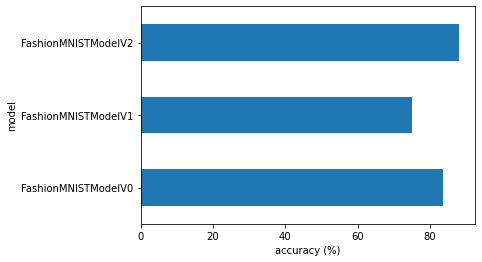

In [67]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

## 9. Make and evaluate random predictions with best model

继续看看我们最好的模型`model_2`的表现、

为此，让我们创建一个函数`make_predictions()`，我们可以在其中传递模型和一些数据以供其预测。

In [68]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())
            
    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [69]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


And now we can use our `make_predictions()` function to predict on `test_samples`.

In [70]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model_2, 
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

tensor([[2.8552e-07, 1.4114e-07, 6.8418e-08, 2.8547e-07, 1.6166e-07, 9.9957e-01,
         1.7274e-06, 6.7051e-06, 5.3702e-05, 3.6482e-04],
        [3.2041e-02, 3.8486e-01, 5.3098e-03, 8.7556e-02, 6.2642e-02, 4.1588e-04,
         4.2540e-01, 1.1453e-03, 4.6975e-04, 1.5839e-04]])

很棒！

现在我们可以通过获取 `torch.softmax()` 激活函数的输出`torch.argmax()` 从预测概率到预测标签。

In [71]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 6, 7, 4, 3, 0, 4, 7, 1])

In [72]:
# Are our predictions in the same form as our test labels? 
test_labels, pred_classes

([5, 1, 7, 4, 3, 0, 4, 7, 1], tensor([5, 6, 7, 4, 3, 0, 4, 7, 1]))

现在我们的预测类别与我们的测试标签格式相同，我们可以进行比较。

由于我们正在处理图像数据，因此让我们忠于数据探索者的座右铭。

“可视化！可视化！可视化！”

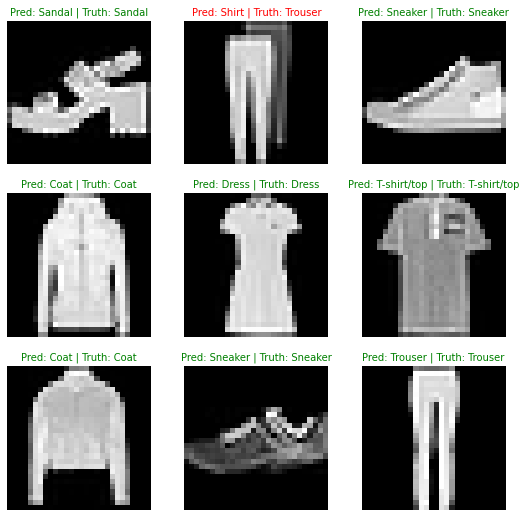

In [73]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]] 

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  
  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

嗯嗯嗯，是不是很好看！

对于几十行 PyTorch 代码来说还不错！

## 10. 制作混淆矩阵以进行进一步的预测评估

有许多[不同的评估指标]（https://www.learnpytorch.io/02_pytorch_classification/#9-more-classification-evaluation-metrics）我们可以用于分类问题。

最直观的一种是[混淆矩阵]（https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/）。

混淆矩阵向您显示您的分类模型在预测和真实标签之间混淆的地方。

要制作混淆矩阵，我们将经历三个步骤：
1. 使用我们经过训练的模型“model_2”（混淆矩阵将预测与真实标签进行比较）进行预测。
2. 使用 [`torch.ConfusionMatrix`](https://torchmetrics.readthedocs.io/en/latest/references/modules.html?highlight=confusion#confusionmatrix) 制作混淆矩阵。
3. 使用 [`mlxtend.plotting.plot_confusion_matrix()`](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/) 绘制混淆矩阵。

让我们从使用我们训练好的模型进行预测开始。

In [74]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

精彩！

现在我们有了预测，让我们进行第 2 步和第 3 步：
2. 使用 [`torchmetrics.ConfusionMatrix`](https://torchmetrics.readthedocs.io/en/latest/references/modules.html?highlight=confusion#confusionmatrix) 制作混淆矩阵。
3. 使用 [`mlxtend.plotting.plot_confusion_matrix()`](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/) 绘制混淆矩阵。

首先，我们需要确保我们已经安装了“torchmetrics”和“mlxtend”（这两个库将帮助我们制作和可视化混淆矩阵）。

> **注意：** 如果您使用的是 Google Colab，默认安装的 `mlxtend` 版本是 0.14.0（截至 2022 年 3 月），但是对于 `plot_confusion_matrix()` 函数的参数，我们会 像使用一样，我们需要 0.19.0 或更高版本。

To plot the confusion matrix, we need to make sure we've got and [`mlxtend`](http://rasbt.github.io/mlxtend/) version of 0.19.0 or higher.

In [79]:
!pip install -q torchmetrics -U mlxtend

In [80]:
# Import mlxtend upgraded version
import mlxtend 
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.20.0


`torchmetrics` 和 `mlxtend` 安装好了，我们来做一个混淆矩阵吧！

首先，我们将创建一个 `torchmetrics.ConfusionMatrix` 实例，通过设置 `num_classes=len(class_names)` 告诉它我们正在处理多少个类。

然后我们将通过将模型的预测 (`preds=y_pred_tensor`) 和目标 (`target=test_data.targets`) 传递给我们的实例来创建一个混淆矩阵（以张量格式）。

最后，我们可以使用 `mlxtend.plotting` 中的 `plot_confusion_matrix()` 函数绘制我们的 confision 矩阵。

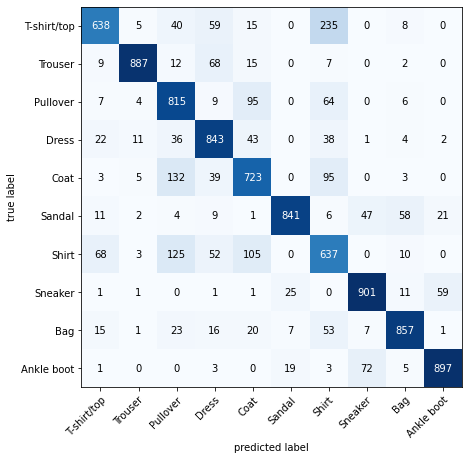

In [81]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy 
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);

哇！这看起来不好吗？

我们可以看到我们的模型做得相当好，因为大多数黑色方块都在从左上角到右下角的对角线下方（理想模型将只有这些方块中的值，其他任何地方都为 0）。

该模型在相似的类别上最“困惑”，例如为实际标记为“衬衫”的图像预测“套头衫”。

对于实际标记为“T 恤/上衣”的类，预测“衬衫”也是如此。

这种信息通常比单个准确度指标更有帮助，因为它告诉使用*哪里*模型出错了。

它还暗示了*为什么*模型可能会出错。

可以理解，该模型有时会为标记为“T 恤/上衣”的图像预测“衬衫”。

我们可以使用此类信息来进一步检查我们的模型和数据，以了解如何改进。

> **练习：** 使用经过训练的“model_2”对测试的 FashionMNIST 数据集进行预测。然后绘制一些模型错误的预测以及图像的标签应该是什么。在将这些预测可视化后，您认为这更像是建模错误还是数据错误？例如，模型能否做得更好，或者数据的标签是否彼此太接近（例如，“衬衫”标签与“T 恤/上衣”太接近）？

## 11. Save and load best performing model

Let's finish this section off by saving and loading in our best performing model.

Recall from [notebook 01](https://www.learnpytorch.io/01_pytorch_workflow/#5-saving-and-loading-a-pytorch-model) we can save and load a PyTorch model using a combination of:
* `torch.save` - a function to save a whole PyTorch model or a model's `state_dict()`. 
* `torch.load` - a function to load in a saved PyTorch object.
* `torch.nn.Module.load_state_dict()` - a function to load a saved `state_dict()` into an existing model instance.

You can see more of these three in the [PyTorch saving and loading models documentation](https://pytorch.org/tutorials/beginner/saving_loading_models.html).

For now, let's save our `model_2`'s `state_dict()` then load it back in and evaluate it to make sure the save and load went correctly. 

In [82]:
from pathlib import Path

# Create models directory (if it doesn't already exist), see: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                 exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), # only saving the state_dict() only saves the learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models\03_pytorch_computer_vision_model_2.pth


Now we've got a saved model `state_dict()` we can load it back in using a combination of `load_state_dict()` and `torch.load()`.

Since we're using `load_state_dict()`, we'll need to create a new instance of `FashionMNISTModelV2()` with the same input parameters as our saved model `state_dict()`.

In [83]:
# Create a new instance of FashionMNISTModelV2 (the same class as our saved state_dict())
# Note: loading model will error if the shapes here aren't the same as the saved version
loaded_model_2 = FashionMNISTModelV2(input_shape=1, 
                                    hidden_units=10, # try changing this to 128 and seeing what happens 
                                    output_shape=10) 

# Load in the saved state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to GPU
loaded_model_2 = loaded_model_2.to(device)

And now we've got a loaded model we can evaluate it with `eval_model()` to make sure its parameters work similarly to `model_2` prior to saving. 

In [84]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn, 
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3261045813560486,
 'model_acc': 88.07907348242811}

Do these results look the same as `model_2_results`?

In [85]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3261045813560486,
 'model_acc': 88.07907348242811}

我们可以使用 `torch.isclose()` 确定两个张量是否彼此接近，并通过参数 `atol`（绝对公差）和 `rtol`（相对公差）传递接近的公差级别。

如果我们模型的结果很接近，`torch.isclose()` 的输出应该为真。

In [86]:
# Check to see if results are close to each other (if they are very far away, there may be an error)
torch.isclose(torch.tensor(model_2_results["model_loss"]), 
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-08, # absolute tolerance
              rtol=0.0001) # relative tolerance

tensor(True)

## Exercises

All of the exercises are focused on practicing the code in the sections above.

You should be able to complete them by referencing each section or by following the resource(s) linked.

All exercises should be completed using [device-agnostic code](https://pytorch.org/docs/stable/notes/cuda.html#device-agnostic-code).

**Resources:**
* [Exercise template notebook for 03](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb)
* [Example solutions notebook for 03](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/solutions/03_pytorch_computer_vision_exercise_solutions.ipynb) (try the exercises *before* looking at this)

1. What are 3 areas in industry where computer vision is currently being used?
2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 
3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.
4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).
    * Upload your own example image using the "upload" button and see what happens in each layer of a CNN as your image passes through it.
5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.
6. Visualize at least 5 different samples of the MNIST training dataset.
7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.
8. Recreate `model_2` used in this notebook (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.
9. Train the model you built in exercise 8. on CPU and GPU and see how long it takes on each.
10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.
11. Plot a confusion matrix comparing your model's predictions to the truth labels.
12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?
13. Use a model similar to the trained `model_2` from this notebook to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
    * Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
    * After visualing these predictions do you think it's more of a modelling error or a data error? 
    * As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

## Extra-curriculum
* **Watch:** [MIT's Introduction to Deep Computer Vision](https://www.youtube.com/watch?v=iaSUYvmCekI&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI&index=3) lecture. This will give you a great intuition behind convolutional neural networks.
* Spend 10-minutes clicking thorugh the different options of the [PyTorch vision library](https://pytorch.org/vision/stable/index.html), what different modules are available?
* Lookup "most common convolutional neural networks", what architectures do you find? Are any of them contained within the [`torchvision.models`](https://pytorch.org/vision/stable/models.html) library? What do you think you could do with these?
* For a large number of pretrained PyTorch computer vision models as well as many different extensions to PyTorch's computer vision functionalities check out the [PyTorch Image Models library `timm`](https://github.com/rwightman/pytorch-image-models/) (Torch Image Models) by Ross Wightman.